In [1]:
import cv2
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# **Quesion 1: PCA**

In [2]:
img = cv2.imread('sample1.jpg')[:, :, ::-1]
img = img / 255
initial_shape = img.shape
pca = PCA(n_components=3)
pca.fit(img.reshape((-1, 3)))
img_transformed = pca.transform(img.reshape((-1, 3)))
img_transformed.shape

(50625, 3)

Text(0.5, 1.0, 'Channel 3')

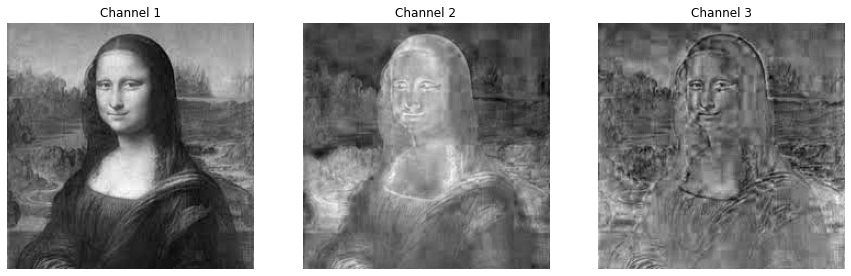

In [3]:
img_transformed = (img_transformed - img_transformed.min()) / img_transformed.max()
img_transformed = img_transformed.reshape(initial_shape)
fig = plt.figure(figsize=(15, 5))

ax0 = plt.subplot(1, 3, 1)
ax0.imshow(img_transformed[:, :, 0], cmap='gray')
ax0.axis('off')
ax0.set_title('Channel 1')

ax1 = plt.subplot(1, 3, 2)
ax1.imshow(img_transformed[:, :, 1], cmap='gray')
ax1.axis('off')
ax1.set_title('Channel 2')

ax2 = plt.subplot(1, 3, 3)
ax2.imshow(img_transformed[:, :, 2], cmap='gray')
ax2.axis('off')
ax2.set_title('Channel 3')

Text(0.5, 0.92, 'Projected Data')

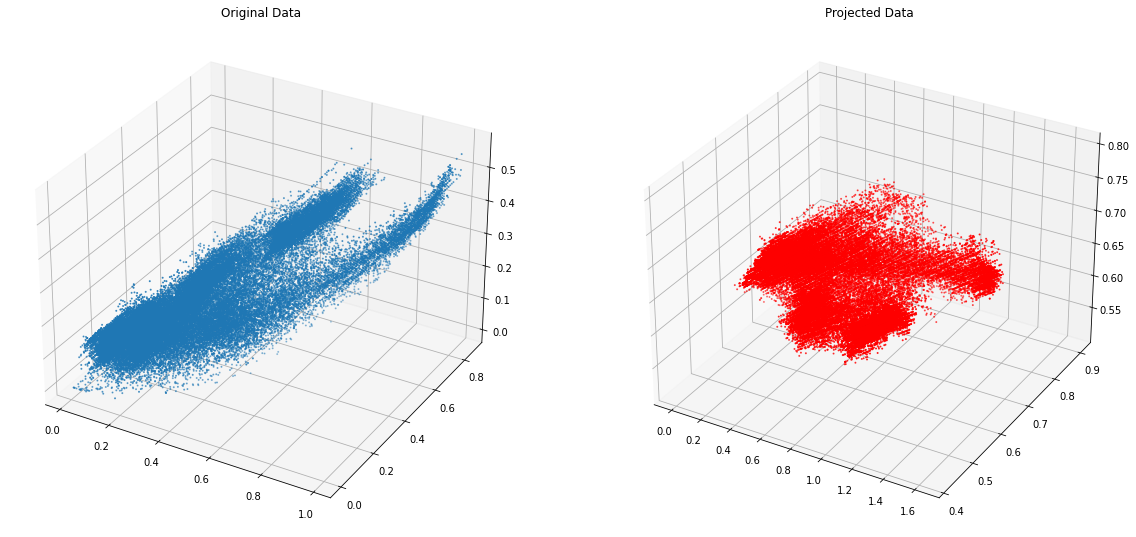

In [4]:
fig = plt.figure(figsize=(20, 10))

ax0 = plt.subplot(1, 2, 1, projection="3d")
ax0.scatter3D(img[:, :, 0], img[:, :, 1], img[:, :, 2], s=1)
ax0.set_title('Original Data')

ax1 = plt.subplot(1, 2, 2, projection="3d")
ax1.scatter3D(img_transformed[:, :, 0], img_transformed[:, :, 1], img_transformed[:, :, 2], s=1, c='red')
ax1.set_title('Projected Data')

# **Quesion 2: 0-1 Mask and Gaussian Filter**

## Circular 0-1 Mask

In [5]:
def create_circular_mask(h, w, r, high_pass=True):
    center = int(h/2), int(w/2)
    Y = np.arange(h).reshape(-1, 1)
    X = np.arange(w).reshape(1, -1)
    dist = np.sqrt((Y - center[0]) ** 2 + (X - center[1]) ** 2)
    if high_pass:
        return (dist > r) * 1
    return (dist < r) * 1


E:\Python Venv\mfi\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'Inversed Fourier')

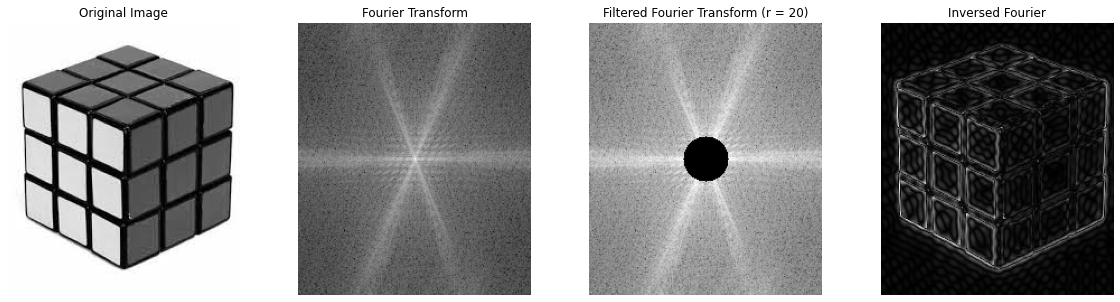

In [6]:
radius = 20

img = cv2.imread('sample2.jpg', flags=cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
mag = np.abs(f)

fig = plt.figure(figsize=(20, 5))

ax0 = plt.subplot(1, 4, 1)
ax0.imshow(img, cmap='gray')
ax0.axis('off')
ax0.set_title('Original Image')

visible = np.fft.fftshift(np.log(mag))
visible = (visible - visible.min()) / visible.max()
ax1 = plt.subplot(1, 4, 2)
ax1.imshow(visible, cmap='gray')
ax1.axis('off')
ax1.set_title('Fourier Transform')

mask = create_circular_mask(mag.shape[0], mag.shape[1], r=radius, high_pass=True)
masked_f = np.fft.fftshift(f) * mask
masked_mag = np.abs(masked_f)
visible = np.log(masked_mag)
visible[visible < 0] = 0
visible = (visible - visible.min()) / visible.max()
ax2 = plt.subplot(1, 4, 3)
ax2.imshow(visible, cmap='gray')
ax2.axis('off')
ax2.set_title('Filtered Fourier Transform (r = {})'.format(radius))

inversed = np.fft.ifft2(np.fft.ifftshift(masked_f))
inversed = np.abs(inversed)
inversed = (inversed - inversed.min()) / inversed.max()
ax3 = plt.subplot(1, 4, 4)
ax3.imshow(inversed, cmap='gray')
ax3.axis('off')
ax3.set_title('Inversed Fourier'.format(radius))

E:\Python Venv\mfi\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


Text(0.5, 1.0, 'Inversed Fourier')

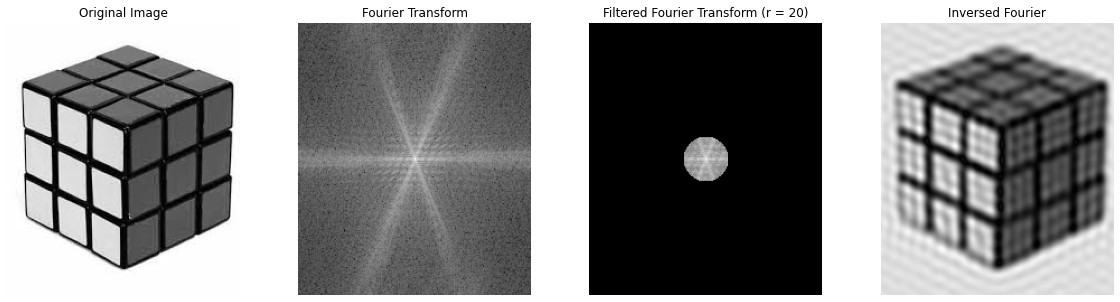

In [7]:
radius = 20

img = cv2.imread('sample2.jpg', flags=cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
mag = np.abs(f)

fig = plt.figure(figsize=(20, 5))

ax0 = plt.subplot(1, 4, 1)
ax0.imshow(img, cmap='gray')
ax0.axis('off')
ax0.set_title('Original Image')

visible = np.fft.fftshift(np.log(mag))
visible = (visible - visible.min()) / visible.max()
ax1 = plt.subplot(1, 4, 2)
ax1.imshow(visible, cmap='gray')
ax1.axis('off')
ax1.set_title('Fourier Transform')

mask = create_circular_mask(mag.shape[0], mag.shape[1], r=radius, high_pass=False)
masked_f = np.fft.fftshift(f) * mask
masked_mag = np.abs(masked_f)
visible = np.log(masked_mag)
visible[visible < 0] = 0
visible = (visible - visible.min()) / visible.max()
ax2 = plt.subplot(1, 4, 3)
ax2.imshow(visible, cmap='gray')
ax2.axis('off')
ax2.set_title('Filtered Fourier Transform (r = {})'.format(radius))

inversed = np.fft.ifft2(np.fft.ifftshift(masked_f))
inversed = np.abs(inversed)
inversed = (inversed - inversed.min()) / inversed.max()
ax3 = plt.subplot(1, 4, 4)
ax3.imshow(inversed, cmap='gray')
ax3.axis('off')
ax3.set_title('Inversed Fourier'.format(radius))

## Gaussian Filter

In [8]:
def create_gaussian_filter(h, w, sigma):
    center = int(h/2), int(w/2)
    Y = np.arange(h).reshape(-1, 1)
    X = np.arange(w).reshape(1, -1)
    # kernel = np.exp(- ((Y - center[0]) ** 2 + (X - center[1]) ** 2) / (2 * sigma**2)) / (2 * np.pi * (sigma ** 2))
    kernel = np.exp(- ((Y - center[0]) ** 2 + (X - center[1]) ** 2) / (2 * sigma**2))
    return kernel


Text(0.5, 1.0, 'Inversed Fourier')

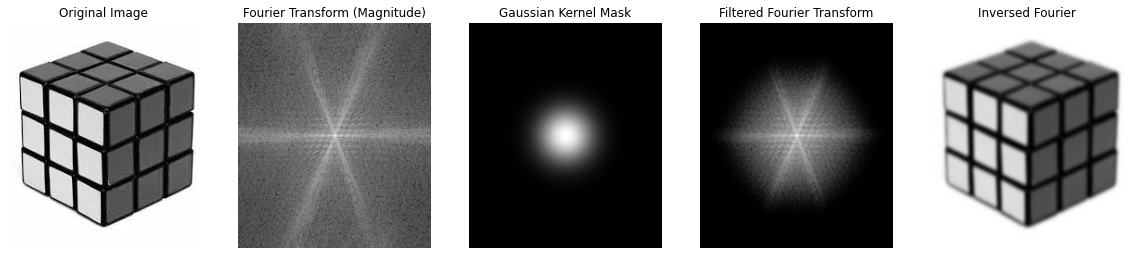

In [9]:
# kernel_constant = 1000

img = cv2.imread('sample2.jpg', flags=cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
mag = np.abs(f)

fig = plt.figure(figsize=(20, 5))

ax0 = plt.subplot(1, 5, 1)
ax0.imshow(img, cmap='gray')
ax0.axis('off')
ax0.set_title('Original Image')

visible = np.fft.fftshift(np.log(mag))
visible = (visible - visible.min()) / visible.max()
ax1 = plt.subplot(1, 5, 2)
ax1.imshow(visible, cmap='gray')
ax1.axis('off')
ax1.set_title('Fourier Transform (Magnitude)')

mask = create_gaussian_filter(mag.shape[0], mag.shape[1], sigma=20)
ax2 = plt.subplot(1, 5, 3)
ax2.imshow(mask, cmap='gray')
ax2.axis('off')
ax2.set_title('Gaussian Kernel Mask')

masked_f = np.fft.fftshift(f) * mask
masked_mag = np.abs(masked_f)
visible = np.log(masked_mag + 1)
visible = (visible - visible.min()) / visible.max()
ax3 = plt.subplot(1, 5, 4)
ax3.imshow(visible, cmap='gray')
ax3.axis('off')
ax3.set_title('Filtered Fourier Transform'.format(radius))

inversed = np.fft.ifft2(np.fft.ifftshift(masked_f))
inversed = np.abs(inversed)
inversed = (inversed - inversed.min()) / inversed.max()
ax4 = plt.subplot(1, 5, 5)
ax4.imshow(inversed, cmap='gray')
ax4.axis('off')
ax4.set_title('Inversed Fourier'.format(radius))

Text(0.5, 1.0, 'Inversed Fourier')

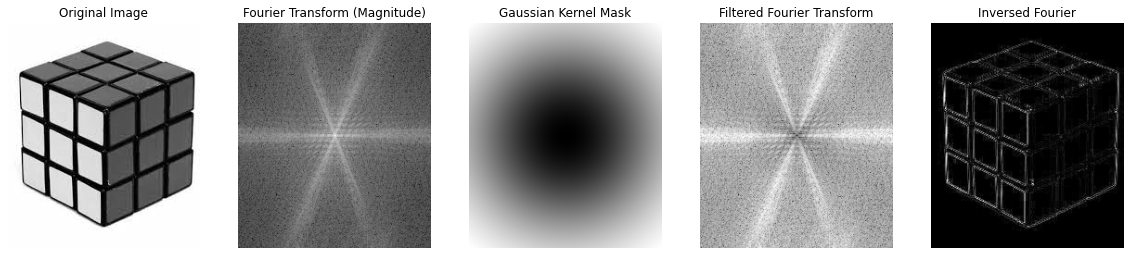

In [10]:
img = cv2.imread('sample2.jpg', flags=cv2.IMREAD_GRAYSCALE)
f = np.fft.fft2(img)
mag = np.abs(f)

fig = plt.figure(figsize=(20, 5))

ax0 = plt.subplot(1, 5, 1)
ax0.imshow(img, cmap='gray')
ax0.axis('off')
ax0.set_title('Original Image')

visible = np.fft.fftshift(np.log(mag))
visible = (visible - visible.min()) / visible.max()
ax1 = plt.subplot(1, 5, 2)
ax1.imshow(visible, cmap='gray')
ax1.axis('off')
ax1.set_title('Fourier Transform (Magnitude)')

mask = create_gaussian_filter(mag.shape[0], mag.shape[1], sigma=80)
mask = 1 - mask
ax2 = plt.subplot(1, 5, 3)
ax2.imshow(mask, cmap='gray')
ax2.axis('off')
ax2.set_title('Gaussian Kernel Mask')

masked_f = np.fft.fftshift(f) * mask
masked_mag = np.abs(masked_f)
visible = np.log(masked_mag + 1)
visible = (visible - visible.min()) / visible.max()
ax3 = plt.subplot(1, 5, 4)
ax3.imshow(visible, cmap='gray')
ax3.axis('off')
ax3.set_title('Filtered Fourier Transform'.format(radius))

inversed = np.fft.ifft2(np.fft.ifftshift(masked_f))
inversed = np.abs(inversed)
inversed = (inversed - inversed.min()) / inversed.max()
ax4 = plt.subplot(1, 5, 5)
ax4.imshow(inversed, cmap='gray')
ax4.axis('off')
ax4.set_title('Inversed Fourier'.format(radius))

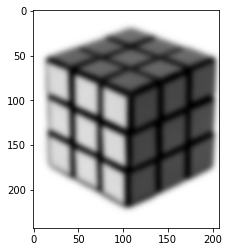

In [15]:
img = cv2.imread('sample2.jpg', flags=cv2.IMREAD_GRAYSCALE)
kernel = create_gaussian_filter(img.shape[0], img.shape[1], 3)
out = signal.convolve2d(img, kernel, 'same', 'symm')
plt.imshow(out, cmap='gray')

# **Quesion 3: Building Hybrid Image**

In [13]:
dog_image = cv2.imread('dog.jpg', flags=cv2.IMREAD_GRAYSCALE)
cat_image = cv2.imread('cat.jpg', flags=cv2.IMREAD_GRAYSCALE)

Text(0.5, 1.0, 'Check Alignment')

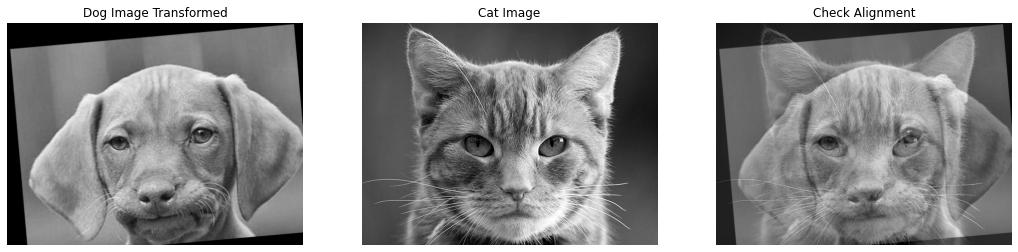

In [14]:
Tx, Ty = 15, 40
transform = np.array([[1, 0, Tx], [0, 1, Ty]]).astype(np.float32)

fig = plt.figure(figsize=(18, 6))

dog_transformed = cv2.warpAffine(dog_image, transform, dog_image.shape)
dog_transformed = dog_transformed[20:324, :]
dog_transformed = cv2.resize(dog_transformed, cat_image.T.shape)

h, w = dog_transformed.shape
angle = 5
center = int(w/2), int(h/2)
rotation = cv2.getRotationMatrix2D(center, angle, 1)
dog_transformed = cv2.warpAffine(dog_transformed, rotation, dog_transformed.T.shape) 

ax0 = plt.subplot(1, 3, 1)
ax0.imshow(dog_transformed, cmap='gray')
ax0.axis('off')
ax0.set_title('Dog Image Transformed')

ax1 = plt.subplot(1, 3, 2)
ax1.imshow(cat_image, cmap='gray')
ax1.axis('off')
ax1.set_title('Cat Image')

weight = 0.6
ax2 = plt.subplot(1, 3, 3)
ax2.imshow(dog_transformed * weight + cat_image * (1-weight), cmap='gray')
ax2.axis('off')
ax2.set_title('Check Alignment')

Text(0.5, 1.0, 'FT of cat image')

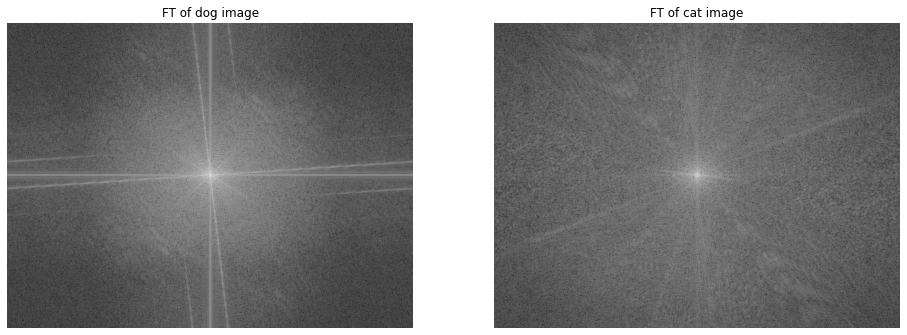

In [15]:
dog = dog_transformed
cat = cat_image

dog_f = np.fft.fft2(dog)
dog_f = np.fft.fftshift(dog_f)
dog_mag = np.abs(dog_f)

cat_f = np.fft.fft2(cat)
cat_f = np.fft.fftshift(cat_f)
cat_mag = np.abs(cat_f)

fig = plt.figure(figsize=(16, 8))

ax0 = plt.subplot(1, 2, 1)
ax0.imshow(np.log(dog_mag), cmap='gray')
ax0.axis('off')
ax0.set_title('FT of dog image')

ax1 = plt.subplot(1, 2, 2)
ax1.imshow(np.log(cat_mag), cmap='gray')
ax1.axis('off')
ax1.set_title('FT of cat image')

(-0.5, 631.5, 474.5, -0.5)

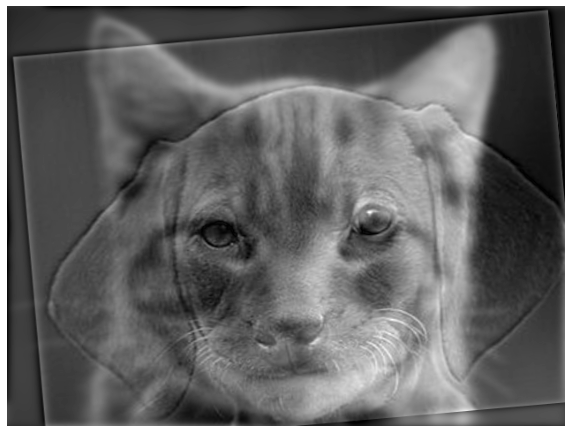

In [16]:
h, w = dog.shape
sigma = 20

high_pass = 1 - create_gaussian_filter(h, w, sigma)
low_pass = create_gaussian_filter(h, w, sigma)

hybrid_f = dog_f * high_pass + cat_f * low_pass
hybrid_image = np.fft.ifft2(np.fft.ifftshift(hybrid_f))
hybrid_image = np.abs(hybrid_image)

fig = plt.figure(figsize=(10, 10))
plt.imshow(hybrid_image, cmap='gray')
plt.axis('off')

(-0.5, 65.5, 49.5, -0.5)

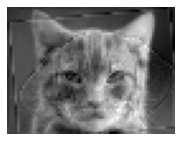

In [17]:
fig = plt.figure(figsize=(3, 3))
plt.imshow(cv2.resize(hybrid_image, (66, 50)), cmap='gray')
plt.axis('off')